## Importing Necessary Libraries

In [1]:
# !pip install evaluate
# !pip install seaborn
# !pip install tensorflow
# !pip install rouge
# !pip install transformers
# !pip install scipy
# !pip install sklearn
# !pip install sentence_transformers
# !pip install nltk
# !pip install sentencepiece
# !pip install accelerate -U
# !pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 135.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 131.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 51.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 41.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [1]:
import os  # Provides functions to interact with the operating system.
import nltk
import time  # Used for timing operations, like measuring the time taken for a function to execute.
import torch  # PyTorch, a deep learning framework used for building and training neural network models.
import psutil  # Provides utilities for system monitoring, used here to monitor memory usage.
import random  # Used for generating random numbers, shuffling data, or selecting items randomly.
import logging  # Used for tracking events that happen during runtime and debugging.
import warnings  # Used to manage warnings; for example, to suppress warnings or display them differently.
import evaluate  # Hugging Face's library to compute metrics for model evaluation.
import numpy as np  # Fundamental package for scientific computing with Python, used for working with arrays.
import pandas as pd  # Data manipulation and analysis library, used for handling structured data.
import seaborn as sns  # Statistical data visualization library based on matplotlib.
from tqdm import tqdm  # Provides a progress bar for loops.
import tensorflow as tf  # TensorFlow, another deep learning library, used here for specific tensor operations.
from rouge import Rouge  # Used for calculating the ROUGE score, a common evaluation metric for text summarization.
from tensorflow import keras  # High-level neural networks API running on top of TensorFlow.
from datasets import Dataset  # Imported twice by mistake, from the Hugging Face's Datasets library for handling datasets.
import matplotlib.pyplot as plt  # Plotting library for creating static, interactive, and animated visualizations in Python.
from transformers import T5Tokenizer  # Tokenizer for T5 models from Hugging Face's Transformers library.
from transformers import EvalPrediction  # Helper class for packaging eval predictions and labels.
from datasets import Dataset, DatasetDict  # Handling datasets, DatasetDict organizes a dictionary of Dataset objects.
from scipy.spatial.distance import cosine  # Function to compute cosine distance between vectors, for similarity calculation.
from scipy.optimize import linear_sum_assignment 
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets.
from sentence_transformers import SentenceTransformer  # Framework for sentence, paragraph, and image embeddings using Transformers.
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction  # BLEU score calculation for evaluating text translation.
from transformers import Seq2SeqTrainer, TrainerCallback, Seq2SeqTrainingArguments, T5ForConditionalGeneration, DataCollatorForSeq2Seq, AutoTokenizer, AutoModel
# Seq2SeqTrainer: Trainer for Seq2Seq tasks like translation or summarization.
# TrainerCallback: Base class for creating callbacks that act at various stages of training.
# Seq2SeqTrainingArguments: Training arguments tailored for Seq2Seq tasks.
# T5ForConditionalGeneration: T5 model for conditional generation tasks.
# DataCollatorForSeq2Seq: Processes data into batches for seq2seq models.


plt.rcParams['figure.dpi'] = 300  # Sets the resolution of plots to 300 DPI for clearer images.
warnings.filterwarnings("ignore")  # Ignores warnings to clean up notebook output.
logging.disable(logging.WARNING)  # Disables logging at and below the WARNING level.

c:\Users\User\anaconda3\envs\FINAL\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading the Cleaned Data

In [2]:
# Reading the data into dataframe
# Here, we load a CSV file into a pandas DataFrame. This step is crucial as it imports the dataset from a file into Python,
# allowing us to manipulate and analyze the data programmatically. 'Nvidia_cleaned_big_quoted.csv' is our customised dataset.
Nvidia_data = pd.read_csv('Nvidia_cleaned_big_quoted.csv')

# Displaying the first few rows to confirm successful reading
# After loading the data, it's good practice to check the first few entries of the DataFrame to ensure that the data has been
# read correctly. This can help verify that the file path is correct, the data format is as expected, and the DataFrame contains
# the correct headers and a representative sample of the actual data.
print("First few rows of the data:")
display(Nvidia_data.head(5))  # The 'head' method displays the first 5 rows of the DataFrame, providing a quick snapshot of the dataset.

First few rows of the data:


,question,answer
0,what is hybridizer?,hybridizer is a compiler for programming gpus ...
1,how does hybridizer generate optimized code?,hybridizer generates optimized code using deco...
2,what are some parallelization patterns mention...,the text mentions parallelization patterns lik...
3,how can you benefit from accelerators without ...,use patterns like parallel.for or cuda-like di...
4,what is an example of using hybridizer?,using parallel.for with a lambda to utilize th...


## Data Preparation

In [3]:
# Ensure consistent columns and drop any missing values
# This step ensures that the dataset contains only the specified columns 'question' and 'answer' and removes any rows where 
# these columns contain missing values. It helps in maintaining data quality and consistency for model training.
Nvidia_data = Nvidia_data[['question', 'answer']].dropna().reset_index(drop=True)

# Split the data into training, validation, and test sets (70% training, 20% validation, 10% test)
# This is essential for machine learning model validation. The dataset is divided into different subsets to train the model, 
# validate its performance during training, and finally test its performance on unseen data.
train_data, temp_set = train_test_split(Nvidia_data, test_size=0.3, random_state=42)
val_set, test_set = train_test_split(temp_set, test_size=1/3, random_state=42)

# Create Hugging Face Dataset objects from Pandas DataFrames
# This step converts the pandas DataFrames into Hugging Face's `Dataset` format, which is optimized for training with 
# transformers and provides efficient data handling and processing.
train_dataset = Dataset.from_pandas(train_data.reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_set.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_set.reset_index(drop=True))

# Combine the datasets into a DatasetDict
# This organizes the datasets in a dictionary format for easy access and manipulation during training and evaluation phases.
dataset_dict = DatasetDict({'train': train_dataset,'validation': val_dataset,'test': test_dataset})

# Initialize the tokenizer for Flan T5
# The tokenizer prepares text data for the Flan T5 model by converting words into tokens that the model can understand.
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")

def tokenizer_for_t5(examples):
    # Tokenize the questions to create input sequences
    # The questions are tokenized into a sequence of numbers (tokens) that represent the text computationally. Tokenization 
    # is necessary for preparing the text data for model processing.
    question_tokenized = tokenizer(examples["question"],max_length=90,truncation=True,
                                   padding="max_length",pad_to_max_length=True,add_special_tokens=True,)
    # Tokenize the answers to create label sequences
    # Similarly, answers are tokenized to serve as labels during the training, allowing the model to learn from input-output pairs.
    answer_tokenized = tokenizer(examples["answer"],max_length=64,truncation=True,
                                 padding="max_length",pad_to_max_length=True,add_special_tokens=True,)
    labels = torch.tensor(answer_tokenized["input_ids"])
    labels[labels == 0] = -100  # Replace padding token IDs with -100 to ignore them in loss calculations.
    # Create the decoder attention mask for the label sequences
    # Attention masks help the model focus on relevant tokens and ignore the padded areas.
    decoder_attention_mask = answer_tokenized["attention_mask"]
    return {'input_ids': question_tokenized['input_ids'],
            'attention_mask': question_tokenized['attention_mask'],
            'labels': labels,
            'decoder_attention_mask': decoder_attention_mask,
           }

# Tokenize the datasets with proper padding and truncation
# This applies the `tokenizer_for_t5` to all datasets to ensure they are correctly formatted and ready for model training.
tokenized_dataset = dataset_dict.map(tokenizer_for_t5, batched=True)

# Ensure the tokenized datasets have consistent padding and truncation
# Sets the format of the datasets to PyTorch tensors, facilitating seamless integration into the training process.
tokenized_dataset.set_format("torch") 

# Return the tokenized datasets for fine-tuning
# This line outputs the fully prepared datasets, which are now ready to be used for training or fine-tuning the model.
tokenized_dataset

Map: 100%|██████████| 696/696 [00:00<00:00, 4785.70 examples/s]


DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels', 'decoder_attention_mask'],
        num_rows: 4869
    })
    validation: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels', 'decoder_attention_mask'],
        num_rows: 1391
    })
    test: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels', 'decoder_attention_mask'],
        num_rows: 696
    })
})

In [4]:
# Random seed for reproducibility
# Setting a fixed seed ensures that the random operations can be replicated exactly the same way each time the code runs.
random.seed(42)

# Get the number of rows for each dataset
# These lines count the total number of entries in each subset (train, validation, test) of our dataset.
train_rows = len(tokenized_dataset["train"])
val_rows = len(tokenized_dataset["validation"])
test_rows = len(tokenized_dataset["test"])

# Calculate the subset size based on the fraction
# Here we're calculating the size of each subset. For training, we use the entire dataset, while for validation and test, we only use 1.5% of the data.
train_subset_size = int(train_rows * 0.25)  # Using 25% of the training data
val_subset_size = int(val_rows * 0.25)  # Using 25% of the validation data
test_subset_size = int(test_rows * 0.25)  # Using 25% of the test data

# Create the subsets by selecting random indices
# These lines generate random indices to select a subset of data. This randomness introduces variety in the subsets used for model training and evaluation.
train_subset_indices = random.sample(range(train_rows), train_subset_size)
val_subset_indices = random.sample(range(val_rows), val_subset_size)
test_subset_indices = random.sample(range(test_rows), test_subset_size)

# Use the indices to create the subsets
# These lines actually create the subsets by selecting the entries corresponding to the random indices we generated. This forms the actual data slices used for model operations.
train_subset = tokenized_dataset["train"].select(train_subset_indices)
val_subset = tokenized_dataset["validation"].select(val_subset_indices)
test_subset = tokenized_dataset["test"].select(test_subset_indices)
test_subset_w_qa = dataset_dict["test"].select(test_subset_indices)

# Combine the subsets into a DatasetDict
# We consolidate these subsets back into a DatasetDict, which is a convenient format for handling train, validation, and test sets within Hugging Face's ecosystem.
subset_dict = DatasetDict({
    'train': train_subset,
    'validation': val_subset,
    'test': test_subset,
    'test_w_qa' : test_subset_w_qa
})

# Display the subsetted DatasetDict
# This display the new dataset dictionary with the subsetted data, ready for use in training or evaluation.
subset_dict

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels', 'decoder_attention_mask'],
        num_rows: 1217
    })
    validation: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels', 'decoder_attention_mask'],
        num_rows: 347
    })
    test: Dataset({
        features: ['question', 'answer', 'input_ids', 'attention_mask', 'labels', 'decoder_attention_mask'],
        num_rows: 174
    })
    test_w_qa: Dataset({
        features: ['question', 'answer'],
        num_rows: 174
    })
})

## Pre-Training Setup

In [5]:
nltk.download('punkt')

# Load the pre-trained model and tokenizer for SMS
sms_model_name = 'sentence-transformers/all-mpnet-base-v2'
sms_tokenizer = AutoTokenizer.from_pretrained(sms_model_name)
sms_model = AutoModel.from_pretrained(sms_model_name)

def get_word_embeddings(sentence):
    """
    Get the embeddings for each word in a sentence using the specified tokenizer and model.
    """
    tokens = nltk.word_tokenize(sentence)
    if not tokens:
        return np.empty((0, 768))  # Return empty array if no tokens
    inputs = sms_tokenizer(tokens, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = sms_model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embeddings

def sentence_movers_similarity(sentence1, sentence2):
    """
    Calculate the Sentence Mover's Similarity (SMS) between two sentences.
    """
    # Get word embeddings for both sentences
    emb1 = get_word_embeddings(sentence1)
    emb2 = get_word_embeddings(sentence2)
    # Ensure embeddings are not empty
    if emb1.size == 0 or emb2.size == 0:
        return 0.0
    # Compute the cost matrix
    cost_matrix = np.linalg.norm(emb1[:, np.newaxis] - emb2[np.newaxis, :], axis=2)
    # Solve the linear sum assignment problem (Earth Mover's Distance)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    total_cost = cost_matrix[row_ind, col_ind].sum()
    # Normalize total cost by the maximum possible cost
    max_cost = np.max(cost_matrix)
    normalized_cost = total_cost / (max_cost * max(len(emb1), len(emb2)))
    # Convert distance to similarity score
    similarity = max(0.0, 1 - normalized_cost)
    return similarity

def precision_recall_fscore_support(labels, predictions):
    """
    Compute precision, recall, and F1 scores treating labels and predictions as sets of tokens.
    """
    labels_tokens = [token.split() for token in labels]
    predictions_tokens = [token.split() for token in predictions]
    labels_set = [set(tokens) for tokens in labels_tokens]
    predictions_set = [set(tokens) for tokens in predictions_tokens]
    precision = sum([len(pred_set & label_set) / len(pred_set) if len(pred_set) > 0 else 0 for pred_set, label_set in zip(predictions_set, labels_set)]) / len(predictions_set)
    recall = sum([len(pred_set & label_set) / len(label_set) if len(label_set) > 0 else 0 for pred_set, label_set in zip(predictions_set, labels_set)]) / len(labels_set)
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    return f1, precision, recall

def compute_metrics(eval_pred):
    """
    Compute various metrics to evaluate the model.
    """
    start_time = time.time()  # Start time for latency calculation
    predictions, labels = eval_pred
    # Convert predictions from logits to token IDs if they're logits (3D)
    if isinstance(predictions, tuple):
        predictions = predictions[0]
    if predictions.ndim == 3:
        predictions = np.argmax(predictions, axis=-1)
    # Replace -100 used for padding in labels with the tokenizer's pad token ID
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode predictions and labels from token IDs to strings
    decoded_predictions = [tokenizer.decode(pred, skip_special_tokens=True, clean_up_tokenization_spaces=True) for pred in predictions]
    decoded_labels = [tokenizer.decode(lbl, skip_special_tokens=True, clean_up_tokenization_spaces=True) for lbl in labels]
    # Calculate precision, recall, and F1 scores
    f1, precision, recall = precision_recall_fscore_support(decoded_labels, decoded_predictions)
    # Calculate ROUGE scores
    rouge = Rouge()
    rouge_scores = rouge.get_scores(decoded_predictions, decoded_labels, avg=True)
    # Calculate BLEU scores
    reference_texts = [[label.split()] for label in decoded_labels]
    candidate_texts = [pred.split() for pred in decoded_predictions]
    bleu_score = np.mean([sentence_bleu(ref, cand, smoothing_function=SmoothingFunction().method1) for ref, cand in zip(reference_texts, candidate_texts)])
    # Calculate cosine similarity using sentence embeddings
    sentence_transformer_model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings_pred = sentence_transformer_model.encode(decoded_predictions)
    embeddings_label = sentence_transformer_model.encode(decoded_labels)
    cosine_similarities = [1 - cosine(embeddings_pred[i], embeddings_label[i]) for i in range(len(decoded_predictions))]
    avg_cosine_similarity = sum(cosine_similarities) / len(cosine_similarities)
    # Calculate Sentence Mover's Similarity (SMS)
    sms_scores = [sentence_movers_similarity(decoded_labels[i], decoded_predictions[i]) for i in tqdm(range(len(decoded_predictions)), desc="Calculating SMS")]
    avg_sms = sum(sms_scores) / len(sms_scores)
    # Memory cleanup
    del decoded_predictions, decoded_labels, embeddings_pred, embeddings_label, rouge, sentence_transformer_model
    torch.cuda.empty_cache()
    # Calculate latency and memory usage
    latency = time.time() - start_time
    process = psutil.Process()
    memory_usage = process.memory_info().rss / (1024 ** 2)  # Convert bytes to MB
    # Return a dictionary containing all calculated metrics
    metrics = {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "rouge-1": rouge_scores['rouge-1']['f'],
        "rouge-2": rouge_scores['rouge-2']['f'],
        "rouge-l": rouge_scores['rouge-l']['f'],
        "bleu": bleu_score,
        "cosine_similarity": avg_cosine_similarity,
        "sentence_movers_similarity": avg_sms,
        "latency": latency,
        "memory_usage": memory_usage
    }
    # Save metrics to a CSV file for history tracking
    df = pd.DataFrame([metrics])
    df.to_csv('metrics_history_FLAN_T5_small_25.csv', mode='a', header=not os.path.exists('metrics_history_FLAN_T5_small_25.csv'))
    return metrics
# Custom callback for tracking training and validation loss.
class LossTrackingCallback(TrainerCallback):
    def __init__(self):
        self.train_loss = []
        self.val_loss = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        # Log training loss for each step where it is available.
        if 'loss' in logs:
            self.train_loss.append((state.global_step, logs['loss']))

    def on_evaluate(self, args, state, control, metrics, **kwargs):
        # Log validation loss after evaluation.
        if 'eval_loss' in metrics:
            self.val_loss.append((state.global_step, metrics['eval_loss']))

# Custom callback to manage GPU memory after each training epoch.
class MemoryCleanupCallback(TrainerCallback):
    def on_epoch_end(self, args, state, control, **kwargs):
        logging.info("Clearing GPU memory at the end of each epoch")
        torch.cuda.empty_cache()  # Clear unused memory.

# Custom callback for adjusting generation settings during evaluation.
class GenerationControlCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, model=None, **kwargs):
        # Adjust model generation settings before evaluation.
        model.config.update({"max_length": 50, "num_return_sequences": 1, "num_beams": 5,
                             "no_repeat_ngram_size": 2, "temperature": 0.7, "top_p": 0.85,
                             "top_k": 40, "early_stopping": True})

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Training Arguments

In [7]:
# Define training arguments for the Seq2Seq model training.
training_args = Seq2SeqTrainingArguments(
    output_dir='./results',  # Specify where model checkpoints and other outputs are saved.
    num_train_epochs=5,  # Total number of training epochs.
    per_device_train_batch_size=8,  # Batch size per device for training.
    per_device_eval_batch_size=4,  # Batch size per device for evaluation.
    warmup_steps=500,  # Number of steps to perform learning rate warmup at the beginning of training.
    weight_decay=0.01,  # Coefficient for weight decay regularization to prevent overfitting.
    evaluation_strategy="epoch",  # Strategy to perform model evaluation after each epoch.
    save_strategy="epoch",  # Strategy to save the model checkpoint after each epoch.
)

# Load the pretrained Flan T5 model from the Hugging Face model hub.
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")
# Initialize the data collator which will dynamically pad the batches during training and evaluation.
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Initialize custom callbacks for training process enhancements.
generation_callback = GenerationControlCallback()  # Custom callback to adjust generation settings during evaluation.
memory_callback = MemoryCleanupCallback()  # Custom callback to release memory after each epoch to avoid CUDA out of memory errors.
loss_callback = LossTrackingCallback()  # Custom callback to track and log training and validation loss.

# Initialize the Seq2SeqTrainer. This is the main training interface for sequence-to-sequence models in the transformers library.
trainer = Seq2SeqTrainer(
    model=model,  # The Flan T5 model to be trained.
    args=training_args,  # Training configuration.
    train_dataset=subset_dict["train"],  # Training dataset.
    eval_dataset=subset_dict["validation"],  # Validation dataset.
    tokenizer=tokenizer,  # Tokenizer used for encoding text data.
    data_collator=data_collator,  # Handles dynamically padding the batches.
    callbacks=[loss_callback, memory_callback, generation_callback],  # Attach the custom callbacks.
    compute_metrics=compute_metrics,  # Function to compute custom metrics during evaluation.
)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

## Fine Tuning

In [8]:
# Train the model using the previously defined trainer and settings.
# This function handles the complete training process including backpropagation, 
# optimization, and validation checks based on the parameters set in the Seq2SeqTrainingArguments.
trainer.train()

# After the training is complete, save the fine-tuned model.
# This step is crucial for preserving the trained model so it can be reloaded later for evaluation or further training.
# The model is saved to the specified directory, ensuring it can be easily accessed or deployed.
trainer.save_model('./Nvidia_flan_t5_small_25_finetuned')

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Rouge-1,Rouge-2,Rouge-l,Bleu,Cosine Similarity,Sentence Movers Similarity,Latency,Memory Usage
1,No log,2.803832,0.427715,0.336745,0.376817,0.403424,0.171865,0.387785,0.073520,0.661604,0.702249,247.051739,5218.128906
2,No log,2.594195,0.460174,0.360927,0.404552,0.427890,0.196025,0.414626,0.088438,0.681619,0.715897,208.510015,5266.257812
3,No log,2.488318,0.480340,0.378030,0.423088,0.444718,0.214093,0.433224,0.096314,0.683158,0.732600,207.299943,5298.359375
4,3.036000,2.425986,0.475284,0.378625,0.421484,0.444728,0.216212,0.434805,0.094834,0.681172,0.741706,214.241428,5357.023438
5,3.036000,2.414297,0.478750,0.380537,0.424031,0.448362,0.218926,0.438710,0.095862,0.684062,0.740355,212.204541,5364.265625


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Calculating SMS: 100%|██████████| 347/347 [03:24<00:00,  1.69it/s]


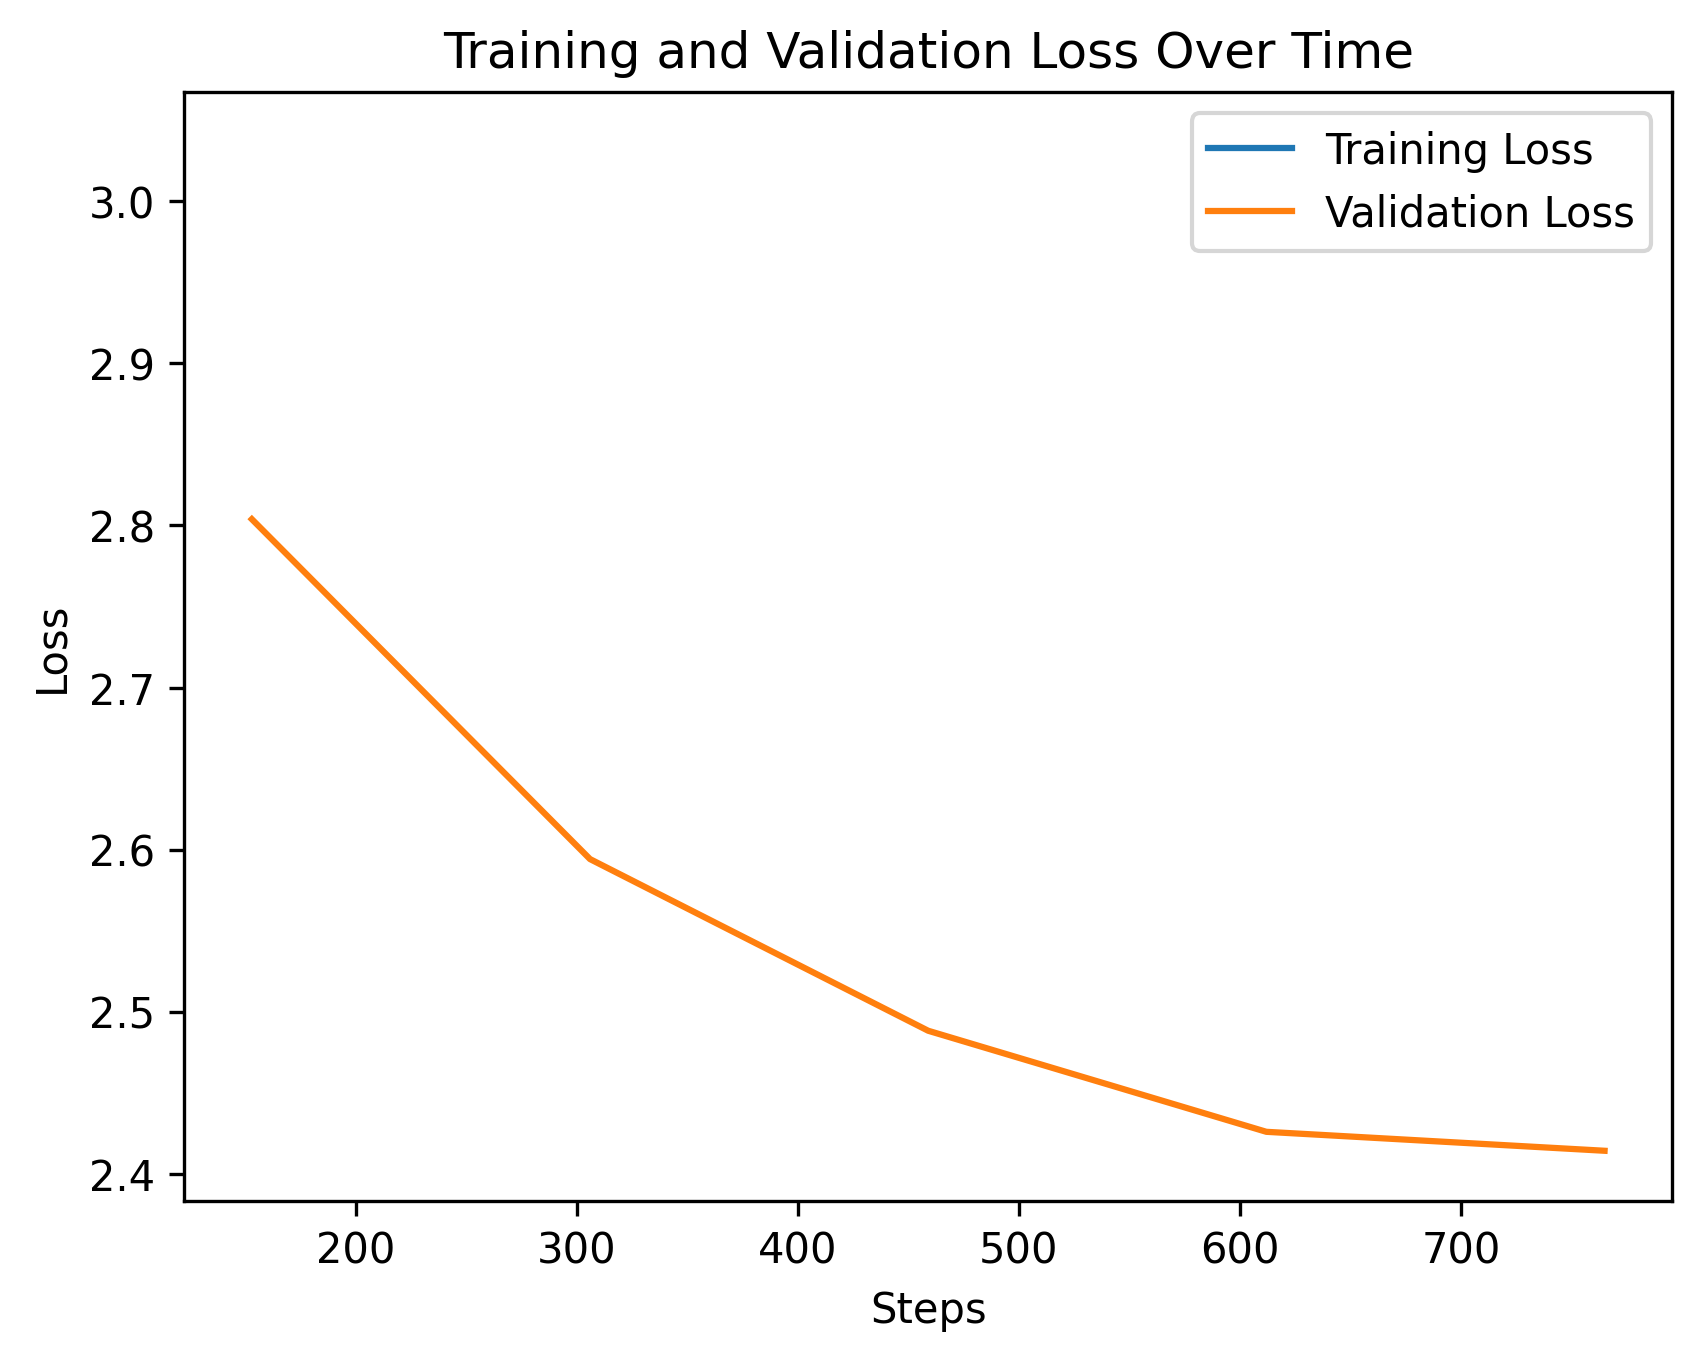

In [9]:
# Extract steps and corresponding losses for training from the loss tracking callback.
train_steps, train_losses = zip(*loss_callback.train_loss)
# Extract steps and corresponding losses for validation from the loss tracking callback.
val_steps, val_losses = zip(*loss_callback.val_loss)

# Create a plot for training and validation losses.
plt.plot(train_steps, train_losses, label="Training Loss")  # Plot training loss as a function of training steps.
plt.plot(val_steps, val_losses, label="Validation Loss")  # Plot validation loss as a function of validation steps.

# Label the x-axis as 'Steps' to indicate the progression of training steps.
plt.xlabel("Steps")
# Label the y-axis as 'Loss' to indicate the loss values.
plt.ylabel("Loss")
# Title the plot to identify the displayed information easily.
plt.title("Training and Validation Loss Over Time")
# Include a legend to differentiate between training and validation loss.
plt.legend()
# Display the plot to visualize the loss trends during training.
plt.show()

## Model Evaluation

In [ ]:
# Load the fine-tuned model and tokenizer from specified directory.
model_path = "./Nvidia_flan_t5_small_25_finetuned"
finetuned_model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(model_path)
# Check if CUDA is available and move the model to the appropriate device (GPU or CPU).
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)  # This should be finetuned_model.to(device). There's a typo in your original code.

# Define training arguments to configure the training process.
training_args = Seq2SeqTrainingArguments(
    output_dir='./results',  # Directory where outputs like model checkpoints will be saved.
    num_train_epochs=5,  # Total number of training epochs.
    per_device_train_batch_size=8,  # Batch size per device for training.
    per_device_eval_batch_size=4,  # Batch size per device for evaluation.
    warmup_steps=500,  # Number of steps to perform learning rate warmup.
    weight_decay=0.01,  # Weight decay to apply.
    evaluation_strategy="epoch",  # Evaluate the model at the end of each epoch.
    save_strategy="epoch"  # Save the model at the end of each epoch.
)

# Initialize callbacks for generation settings, tracking loss, and memory cleanup.
generation_callback = GenerationControlCallback()
loss_callback = LossTrackingCallback()
memory_callback = MemoryCleanupCallback()

# Initialize the trainer with the model, training arguments, and callbacks.
# The compute_metrics function is used to calculate performance metrics.
trainer = Seq2SeqTrainer(
    model=model,  # This should be finetuned_model instead of model.
    args=training_args,
    callbacks=[generation_callback, loss_callback, memory_callback],
    compute_metrics=compute_metrics
)

# Load the test dataset.
test_dataset = tokenized_dataset['test']  # Ensure this dataset is correctly loaded or prepared.

# Evaluate the model on the test dataset and display the results.
test_results = trainer.evaluate(test_dataset)
df_results = pd.DataFrame([test_results])
display(df_results)

Calculating SMS:  86%|████████▋ | 602/696 [05:54<01:00,  1.55it/s]

In [ ]:
df_results.to_csv("FlanT5_small_25_Test_Results.csv")

## Randomly Predicting Answer using the Trained Model

In [ ]:
# Define the model path where the fine-tuned T5 model and tokenizer are stored
model_path = "./Nvidia_flan_t5_small_25_finetuned"

# Load the fine-tuned model and tokenizer from the specified path
finetuned_model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(model_path)

# Check if a GPU is available and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"

# Move the model to the appropriate device (GPU or CPU)
finetuned_model.to(device)

# Convert the test dataset to a list to facilitate random sampling
test_dataset_list = list(tokenized_dataset["test"])

# Randomly select 5 questions from the test dataset for demonstration purposes
random_questions = random.sample(test_dataset_list, 5)

# Loop through the selected questions and predict their answers using the fine-tuned model
for i, sample in enumerate(random_questions, start=1):
    # Tokenize the question text and move the tensors to the device where the model is
    inputs = tokenizer(sample["question"], return_tensors="pt").to(device)
    
    # Generate answers using the model's generate method with specified settings
    outputs = finetuned_model.generate(**inputs, max_length=50, num_return_sequences=1, num_beams=5,
                                       no_repeat_ngram_size=2, temperature=0.7, top_p=0.85, top_k=40,
                                       early_stopping=True)
    
    # Decode the generated tensor into a plain text string while stripping special tokens
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
    
    # Print each sample's question, actual answer, and predicted answer for comparison
    print(f"Sample {i}:")
    print("\nQuestion:", sample["question"])
    print("\nActual Answer:", sample["answer"])
    print("\nPredicted Answer:", predicted_answer)
    print("-" * 40)  # Print a separator line for better readability

In [9]:
model_path = "./Nvidia_flan_t5_small_25_finetuned"

# Load the fine-tuned model and tokenizer from the specified path
finetuned_model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(model_path)

# Check if a GPU is available and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"

# Move the model to the appropriate device (GPU or CPU)
finetuned_model.to(device)

# Convert the test dataset to a list to facilitate random sampling
test_dataset_list = list(tokenized_dataset["test"])

# Randomly select 5 questions from the test dataset for demonstration purposes
random_questions = random.sample(test_dataset_list, 5)

# Start timing for the entire batch
batch_start_time = time.time()

# Loop through the selected questions and predict their answers using the fine-tuned model
for i, sample in enumerate(random_questions, start=1):
    # Start timing for a single question
    start_time = time.time()

    # Tokenize the question text and move the tensors to the device where the model is
    inputs = tokenizer(sample["question"], return_tensors="pt").to(device)

    # Generate answers using the model's generate method with specified settings
    outputs = finetuned_model.generate(**inputs, max_length=50, num_return_sequences=1, num_beams=5,
                                       no_repeat_ngram_size=2, temperature=0.7, top_p=0.85, top_k=40,
                                       early_stopping=True)

    # End timing for a single question
    end_time = time.time()

    # Decode the generated tensor into a plain text string while stripping special tokens
    predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    # Print each sample's question, actual answer, and predicted answer for comparison
    print(f"Sample {i}:")
    print("\nQuestion:", sample["question"])
    print("\nActual Answer:", sample["answer"])
    print("\nPredicted Answer:", predicted_answer)
    print("Inference Time for this question: {:.2f} seconds".format(end_time - start_time))
    print("-" * 40)  # Print a separator line for better readability

# End timing for the entire batch
batch_end_time = time.time()

# Print the total time taken for all inferences
print("Average Inference Time for 5 questions: {:.2f} seconds".format((batch_end_time - batch_start_time)/5))


Sample 1:

Question: what is the potential use case of the growing allocator in data analytics?

Actual Answer: the growing allocator enhances memory utilization in data analytics, especially for data-dependent join operations.

Predicted Answer: the growing allocator in data analytics is a tool for analyzing data and generating data.
Inference Time for this question: 0.53 seconds
----------------------------------------
Sample 2:

Question: what is the significance of the graalvm community edition?

Actual Answer: the graalvm community edition is a free, open-source platform for developers.

Predicted Answer: the graalvm community edition enables users to create gpu-based applications.
Inference Time for this question: 0.52 seconds
----------------------------------------
Sample 3:

Question: how can you achieve load balancing among threads in a gpu application?

Actual Answer: distribute tasks evenly among threads, using techniques like dynamic parallelism and workload partitioning f

# Accuracy for Human Evaluation

In [6]:
import csv
# Define the model path where the fine-tuned T5 model and tokenizer are stored
model_path = "./Nvidia_flan_t5_small_25_finetuned"

# Load the fine-tuned model and tokenizer from the specified path
finetuned_model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(model_path)

# Check if a GPU is available and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"
# Move the model to the appropriate device (GPU or CPU)
finetuned_model.to(device)

# Convert the test dataset to a list to facilitate random sampling
test_dataset_list = list(tokenized_dataset["test"])

with open('predictions.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(['Question', 'Actual Answer', 'Predicted Answer'])
    
    # Loop through all questions in the test dataset and predict their answers
    for sample in test_dataset_list:
        # Tokenize the question text and move the tensors to the device where the model is
        inputs = tokenizer(sample["question"], return_tensors="pt").to(device)
        
        # Generate answers using the model's generate method with specified settings
        outputs = finetuned_model.generate(**inputs, max_length=50, num_return_sequences=1, num_beams=5,
                                           no_repeat_ngram_size=2, temperature=0.7, top_p=0.85, top_k=40,
                                           early_stopping=True)
        
        # Decode the generated tensor into a plain text string while stripping special tokens
        predicted_answer = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
        
        # Write each sample's question, actual answer, and predicted answer to the CSV file
        writer.writerow([sample['question'], sample['answer'], predicted_answer])

In [12]:
import pandas as pd

# Load the CSV file
file_path = 'prediction_flant5_small_25.csv'
data = pd.read_csv(file_path)

# Define a function to convert the outcome text to a numeric value
def outcome_to_numeric(outcome):
    outcome = outcome.strip().lower()  # Clean and lower-case the text
    if outcome == 'incorrect':
        return 0
    elif outcome == 'partially correct':
        return 0.5
    elif outcome == 'correct':
        return 1
    else:
        return None

# Apply the function to the 'outcome' column to create 'value_outcome'
data['value_outcome'] = data['outcome'].apply(outcome_to_numeric)

# Calculate the average of the 'value_outcome' column
average_value_outcome = (data['value_outcome'].mean())*100
print("Average of value_outcome:", average_value_outcome, "%")


Average of value_outcome: 7.902298850574713 %
